In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading Dataset

In [12]:
df = pd.read_csv('Fraud.csv')

In [13]:
df.shape

(6362620, 11)

In [14]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Checking for imbalance

In [18]:
df.isFraud.describe()

count    6.362620e+06
mean     1.290820e-03
std      3.590480e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: isFraud, dtype: float64

In [19]:
print("No Frauds:",df['isFraud'].value_counts()[0]/len(df['isFraud'])*100)
print("Frauds:",df['isFraud'].value_counts()[1]/len(df['isFraud'])*100)

No Frauds: 99.87091795518198
Frauds: 0.12908204481801522


#### PS the data is heavily imbalanced, i.e only 0.12% values are mentioned fraud

#### Let's first analyse the numerical variables

In [20]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


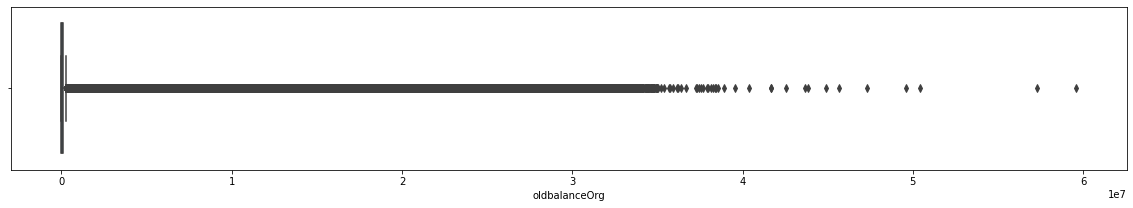

In [21]:
# Boxplot of 'oldbalanceOrg'
plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='oldbalanceOrg')
plt.show()

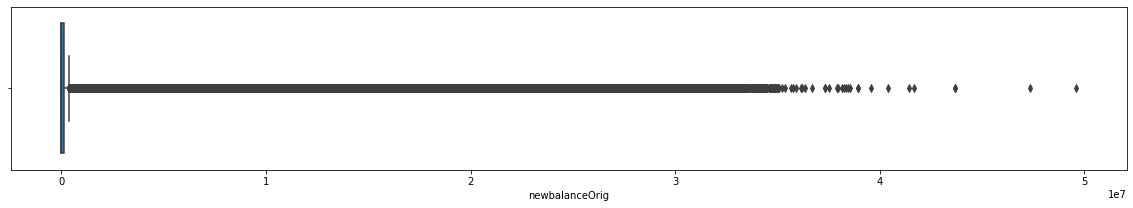

In [22]:
# Boxplot of 'newbalanceOrig'
plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='newbalanceOrig')
plt.show()

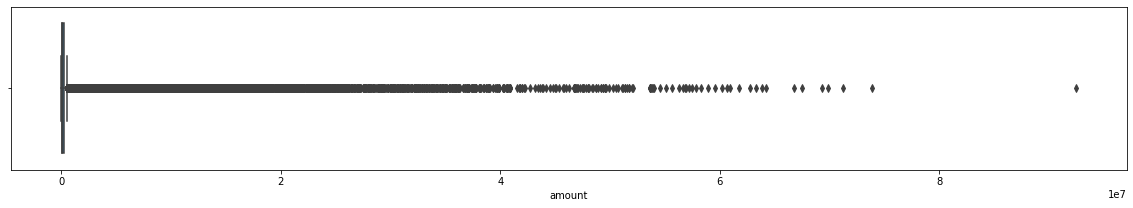

In [23]:
# Boxplot of 'amount'
plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='amount')
plt.show()

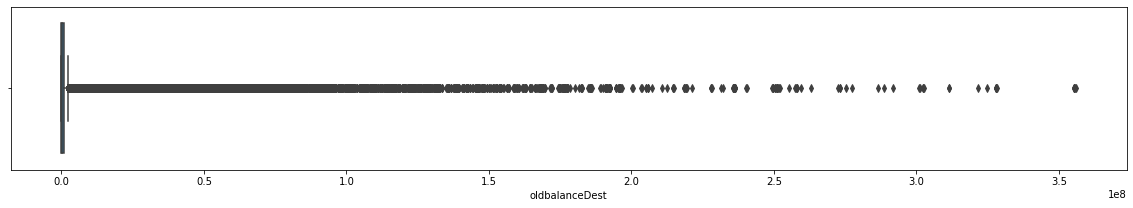

In [24]:
# Boxplot of 'oldbalanceDest'
plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='oldbalanceDest')
plt.show()

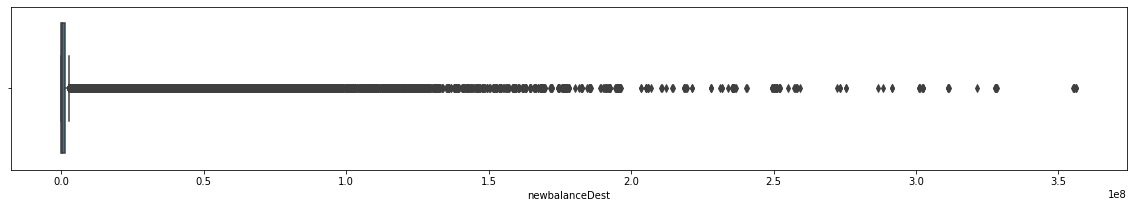

In [25]:
# Box plot of 'newbalanceDest'
plt.figure(figsize=(20,3))
sns.boxplot(data=df, x='newbalanceDest')
plt.show()

#### Balance for the payer and the reciever will keep varying and will have a wide range, cannot really do much about these

#### Analysing other categorical variables

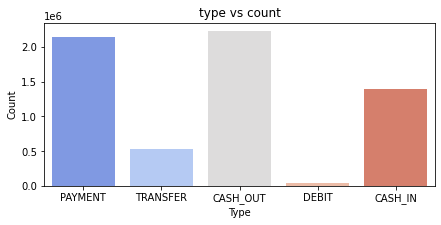

In [26]:
# Countplot of 'type'
plt.figure(figsize=(7,3))
plt.title('type vs count')
sns.countplot(data=df,x='type',palette='coolwarm')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

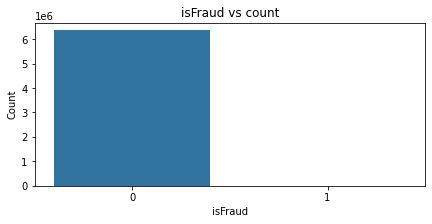

In [27]:
# Countplot of 'isFraud'
plt.figure(figsize=(7,3))
plt.title('isFraud vs count')
sns.countplot(data=df,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.show()

#### Feature engineering & selection

In [28]:
# dropping unnecesaary columns

df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [29]:
# transorming categorical variables, assigning them dummy

df=pd.get_dummies(data=df,columns=['type'],drop_first=True)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [30]:
# Creating independent and dependent feature distinction

columns = df.columns.tolist()
columns = [c for c in columns if c not in ['isFraud']]
target = 'isFraud'

state = np.random.RandomState(40)

X = df[columns]
Y = df[target]

In [31]:
X.shape

(6362620, 10)

In [32]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,1,0


In [33]:
Y.shape

(6362620,)

#### Moving on to balance the data set since the dataset is free from null values and unwanted oitliers. We will use imblearn library of Python

#### We will be using oversampling as undersampling might result in loss of a large amount of data and thus lead to underfitting

In [34]:
#from imblearn.combine import SMOTETomek

In [35]:
#smk = SMOTETomek(random_state=40)
#X_res, y_res = smk.fit_resample(X,Y)

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
# Oversampling now

ros = RandomOverSampler(sampling_strategy = 'not majority')

In [38]:
X_res, y_res = ros.fit_resample(X,Y)

In [39]:
X_res, y_res

(          step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
 0            1     9839.64      170136.00       160296.36            0.00   
 1            1     1864.28       21249.00        19384.72            0.00   
 2            1      181.00         181.00            0.00            0.00   
 3            1      181.00         181.00            0.00        21182.00   
 4            1    11668.14       41554.00        29885.86            0.00   
 ...        ...         ...            ...             ...             ...   
 12708809    79   353045.35      353045.35            0.00            0.00   
 12708810   387        0.00           0.00            0.00      7970766.57   
 12708811   102   548335.12      548335.12            0.00      6534669.47   
 12708812   559  1431634.93     1431634.93            0.00            0.00   
 12708813   212   296699.39      296699.39            0.00       162636.95   
 
           newbalanceDest  type_CASH_OUT  type_DEBIT  type_PAY

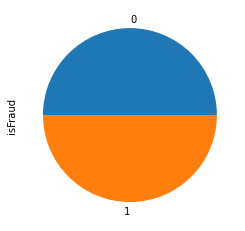

In [40]:
# Rechecking for the imbalances

ax = y_res.value_counts().plot.pie()

In [41]:
X_res.shape

(12708814, 10)

In [42]:
# Splitting data into train & test samples

from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res)

In [44]:
# Using RobustScaler to scale down the numerical features as RobustScaler is less prone to outliers

from sklearn.preprocessing import RobustScaler

numerical = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

scale=RobustScaler()

for feature in numerical:
    X_train[feature]=scale.fit_transform(X_train[feature].values.reshape(-1, 1))

X_train.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6778874,-1.048583,0.236053,0.219542,0.00,1.865275,1.031725,1,0,0,0
12540449,-0.421053,2.623441,1.748311,0.00,0.000000,-0.113732,0,0,0,1
8720626,1.453441,-0.277012,-0.109000,0.00,0.000000,-0.083754,1,0,0,0
3224522,-0.133603,0.758325,-0.142745,560687.83,0.000000,-0.113732,0,0,0,0
10085618,-1.080972,-0.100533,0.004009,0.00,1.277467,0.597951,1,0,0,0


In [45]:
corr = X_res.corr()

In [46]:
# Plotting the each indipendent feature correlation

corr.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
step,1.000000,0.148622,0.075284,-0.021656,-0.006265,0.027519,0.042529,-0.016959,-0.143340,0.151003
amount,0.148622,1.000000,0.643686,0.123003,0.015135,0.274134,0.048601,-0.025056,-0.195944,0.196981
oldbalanceOrg,0.075284,0.643686,1.000000,0.825067,0.012266,0.123660,-0.097164,-0.020571,-0.162434,0.067744
newbalanceOrig,-0.021656,0.123003,0.825067,1.000000,0.044590,0.009780,-0.177222,-0.010438,-0.082987,-0.049162
oldbalanceDest,-0.006265,0.015135,0.012266,0.044590,1.000000,0.922454,0.110576,0.011384,-0.110249,-0.085881
newbalanceDest,0.027519,0.274134,0.123660,0.009780,0.922454,1.000000,0.214855,0.003934,-0.149468,-0.124766
type_CASH_OUT,0.042529,0.048601,-0.097164,-0.177222,0.110576,0.214855,1.000000,-0.049311,-0.389236,-0.552289
type_DEBIT,-0.016959,-0.025056,-0.020571,-0.010438,0.011384,0.003934,-0.049311,1.000000,-0.025818,-0.036633
type_PAYMENT,-0.143340,-0.195944,-0.162434,-0.082987,-0.110249,-0.149468,-0.389236,-0.025818,1.000000,-0.289161
type_TRANSFER,0.151003,0.196981,0.067744,-0.049162,-0.085881,-0.124766,-0.552289,-0.036633,-0.289161,1.000000


#### Training the first model

#### We will be training a Logistic Regression model

In [47]:
# 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {'LR': LogisticRegression(), 'DTC': DecisionTreeClassifier(), 'RFC': RandomForestClassifier()}

In [ ]:
for i in range (len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred, average = 'weighted')
    model_train_precision = precision_score (y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred, average = 'weighted')
    model_test_precision = precision_score (y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    
    print (list(models.keys())[i])
    
    print ('Model perfoirmance for train set')
    print ('Accuracy: {:.4f}'.format(model_train_accuracy))
    print ('F1 Score: {:.4f}'.format(model_train_f1))
    print ('Precision: {:.4f}'.format(model_train_precision))
    print ('Recall: {:.4f}'.format(model_train_recall))
    
    print('------------------------------------------------')
    
    print ('Model perfoirmance for test set')
    print ('Accuracy: {:.4f}'.format(model_test_accuracy))
    print ('F1 Score: {:.4f}'.format(model_test_f1))
    print ('Precision: {:.4f}'.format(model_test_precision))
    print ('Recall: {:.4f}'.format(model_test_recall))

LR
Model perfoirmance for train set
Accuracy: 0.8232
F1 Score: 0.8218
Precision: 0.8926
Recall: 0.7346
------------------------------------------------
Model perfoirmance for test set
Accuracy: 0.7545
F1 Score: 0.7493
Precision: 0.6976
Recall: 0.8991
DTC
Model perfoirmance for train set
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
------------------------------------------------
Model perfoirmance for test set
Accuracy: 0.5093
F1 Score: 0.3540
Precision: 0.9999
Recall: 0.0192


In [ ]:
#from sklearn.model_selection import StratifiedKFold
#skf=StratifiedKFold(n_splits=3, shuffle=False, random_state=None)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# classifier=LogisticRegression()

# param={'C':10.0 **np.arange(-1,2)}
#lrs=RandomizedSearchCV(classifier, param,cv=skf,n_jobs=-1,scoring='accuracy')
#lrs.fit(X_train,y_train)

In [ ]:
#y_pred = classifier.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score, classification_report, \
    #confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
#accuracy = accuracy_score(y_pred, y_test)

In [ ]:
#accuracy

In [ ]:
#print(classification_report(y_pred, y_test))